<a href="https://colab.research.google.com/github/govarthananmba768/model/blob/main/project1_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [ ]:
# load data set 
data=pd.read_csv('/content/data.csv')

In [ ]:
data.head()
data.tail(20)

In [ ]:
data.shape

In [ ]:
#checking the data infromation 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [ ]:
# data.describe().style.background_gradient(cmap='magma_r')
data.describe().style.background_gradient(cmap='PuBu_r')


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,2099.333529
std,4.652502,0.051459,62.086938,8.371664,1542.432736
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,878.856000
50%,12.600000,0.054021,142.247000,1999.000000,1828.273366
75%,16.750000,0.094037,185.855600,2004.000000,2949.298043
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Data cleaning process



1.  Firstly we check the null values if the data contains the null values replce with mean and mode values

2.   Then we also check the duplicate values in the data set, if it contains duplicate remove it
3.   Checking the number of uniques values in the each categorical columns in the data set





In [ ]:
 # Checking the null values
null_val=data.isna().sum()
print(null_val)
for col in null_val[null_val>0].index:
  print(f'\n {col} {null_val[col]} null values')
  print('Data type of{} is {}'.format(col,data[col].dtype ))


Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

 Item_Weight 2439 null values
Data type ofItem_Weight is float64

 Outlet_Size 4016 null values
Data type ofOutlet_Size is object


In [ ]:
print('The mean value',data['Item_Weight'].mean())
# print('The mean value',data['Item_Weight'].mode())             # Item_ weight type is float so we take mean value 
print('The mode value Outlet_ Size',data['Outlet_Size'].mode())  # Outlet Size type is object that is reason to take mode value

In [ ]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.380000
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2213.476465
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2349.547110
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1892.981544
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,4533.564958


In [ ]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

In [ ]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

In [ ]:
# Checking the null values
null=data.isnull().sum()
null

In [ ]:
#Checking the duplicate values 
duplicates=data[data.duplicated()]
print('Duplicate values in the data set',duplicates.shape[0])

Duplicate values in the data set 0


In [ ]:
#Checking the unique values in the objects columns 
for col in data.dtypes.index:
    if data[col].dtype=='object':
        print('\n Total unique values in the columns {} is '.format(col),data[col].nunique())


 Total unique values in the columns Item_Identifier is  1559

 Total unique values in the columns Item_Fat_Content is  5

 Total unique values in the columns Item_Type is  16

 Total unique values in the columns Outlet_Identifier is  10

 Total unique values in the columns Outlet_Size is  3

 Total unique values in the columns Outlet_Location_Type is  3

 Total unique values in the columns Outlet_Type is  4


In [ ]:
#Correlation heatmap using the 
corr=data.corr()
fig,ax=plt.subplots(figsize=(10,5))
sns.heatmap(corr,annot=True,linewidths=.7)
plt.title("Heat Map to find the correlation ")
plt.show()

In [ ]:
#Correlation heatmap using the 
corr=data.corr()
fig,ax=plt.subplots(figsize=(10,6))
sns.heatmap(corr,annot=True,
      linewidths=.5)
plt.title("Visualize the heatmap")
plt.show()

In [ ]:
#Replace the values in in to single values
data.replace(to_replace=["LF", "low fat",'reg'],
           value=['Low Fat','Low Fat','Regular'],inplace=True)

In [ ]:
data['Item_Fat_Content']

2

In [ ]:
#Visualize the fact content in the data using the pie chart with differnt colors with percentages
data['Item_Fat_Content'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',explode=[0.03,0.05],
    labels=['Low Fat', 'Regular'],
    colors=['#C8FE2E','#DF013A'],
    autopct='%1.2f%%',
    shadow=True)
plt.title("Visualize the Item fact content in the data using the pie chart with percentage wise")
plt.show()

In [ ]:
data.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean()
data.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()

Outlet_Size
High      2201.291586
Medium    2207.239211
Small     1824.461411
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
#Visualize the the average sales of the outlet location with outlest sales 
data.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)\
.plot(kind='barh',figsize=(10,6),title="Visualize the Average saler of the outletlocation with outlet salse",color=['#F5BCA9','#FF0000','#61210B'])
plt.xlabel("Average of the sales")
plt.ylabel("Outlet citys")
plt.show()

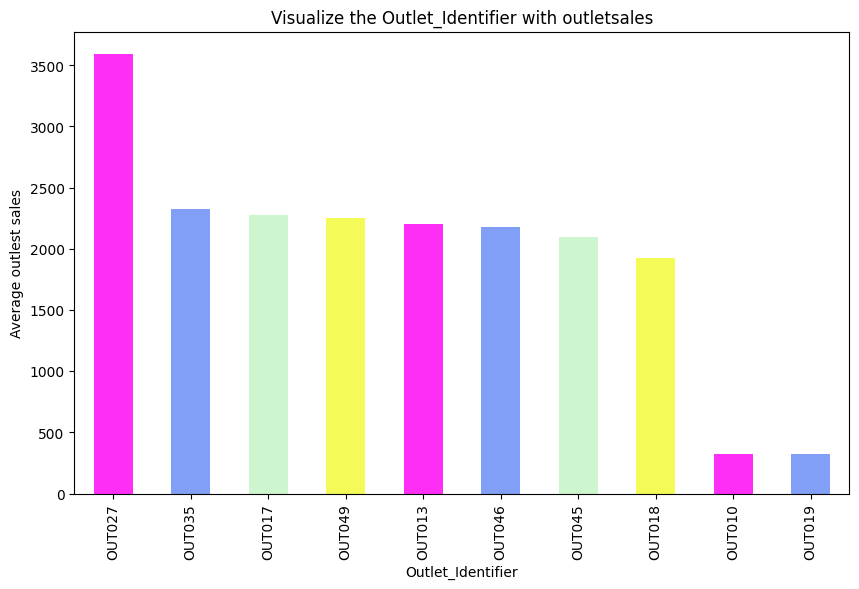

In [ ]:
#Visualize the average outelet sales with outlete identifiers
data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,6),title="Visualize the Outlet_Identifier with outletsales",color=['#FE2EF7','#819FF7','#CEF6CE','#F4FA58'])
plt.xlabel("Outlet_Identifier")
plt.ylabel("Average outlest sales")
plt.show()

In [ ]:
data['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

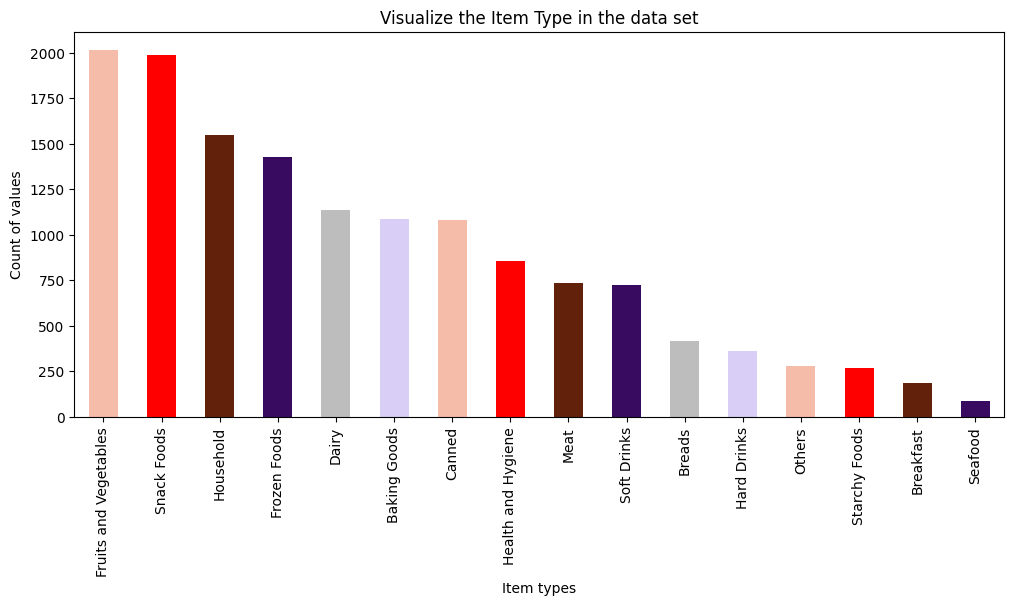

In [ ]:
#Same way we visualize the item type in the data set using the bar charts
data['Item_Type'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(12,5),title="Visualize the Item Type in the data set",color=['#F5BCA9','#FF0000','#61210B','#380B61','#BDBDBD','#D8CEF6'])
plt.xlabel("Item types")
plt.ylabel("Count of values")
plt.show()

Observations:

1.From the above pie chart 65% items contains the low fat and remaing 35 % contains normal fat.

2.In the second bar chart Fruits and vegetables snack food have same count in the chart.

3.In the above chart seafood have least values in the data

In [ ]:
data['Outlet_Establishment_Year'].value_counts()

In [ ]:

#Find the year wise outlet establishment 
data['Outlet_Establishment_Year'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',title="Visualize the outlet_Establishment with year wise",figsize=(10,5),color=['#FE2EF7','#819FF7','#CEF6CE','#F4FA58','#F6E3CE','#F5A9D0'])
plt.xlabel("Year")
plt.ylabel("Count of values")
plt.show()

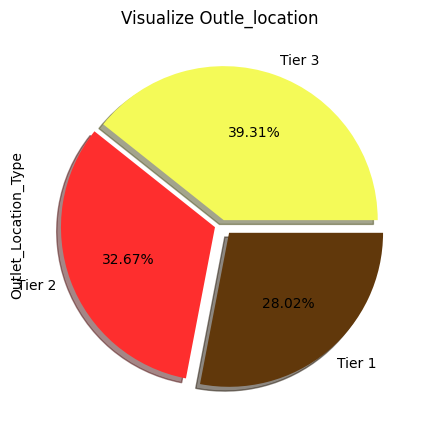

In [ ]:
#Visualize the Outlet_Location_Type
data['Outlet_Location_Type'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',figsize=(10,5),title='Visualize Outle_location ',
     explode=[0.03,0.05,0.07],
    labels=['Tier 3', 'Tier 2','Tier 1'],
    colors=['#F4FA58','#FE2E2E','#61380B'],
    autopct='%1.2f%%',
    shadow=True)
plt.show()

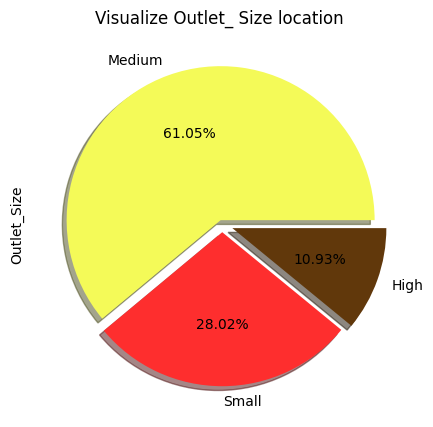

In [ ]:
#Visualize the Outlet_Location_Type
data['Outlet_Size'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',figsize=(10,5),title='Visualize Outlet_ Size location ',
     explode=[0.03,0.05,0.07],
     colors=['#F4FA58','#FE2E2E','#61380B'],
    autopct='%1.2f%%',
    shadow=True)
plt.show()

Observations:

1.From the above two chart we observe in the 1985 most of the outlet extablished.

2.And remaing years have same values for outlet and 1989 have leaset values.

3.From the Second chart tire 3 have more outlet locations, and secondly tire2  tire 1 have leaset outlet cities.

4.Outlet_Size Medium have the high Percentage.

In [ ]:
#Visuslize item Mrp price
sns.histplot(data=data,x='Item_MRP', bins=50, pthresh=.1, color='red',stat='count',kde=True)
plt.show()

In [ ]:
#Visualize the Sum of the each item type with Mrp Price
data.groupby('Item_Type')['Item_MRP'].sum().sort_values(ascending=False)\
.plot(kind='bar',title="Visualize the each item type with sum of the mrp price",figsize=(10,6),color=['#DF0101','#088A08','#0B0B61','#0A2229','#8258FA','#81F781'])
plt.xlabel("Item Type")
plt.ylabel("Sum of the Each item MRP Price")
plt.show()


In [ ]:
data['Outlet_Establishment_Year']

0        1999
1        2009
2        1999
3        1998
4        1987
         ... 
14199    1997
14200    2009
14201    2002
14202    2007
14203    2002
Name: Outlet_Establishment_Year, Length: 14204, dtype: int64

In [ ]:
'''in the code  the Outlet_identifier values equal to the outo49 and loc the data with item_type 
and visualize with bar chart'''
OUT049=data['Outlet_Identifier']=='OUT049'
data.loc[OUT049]['Item_Type'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,6),title="Visualize the OUT049 with item_type",color=['#5F04B4','#088A68','#FACC2E','#DA81F5'])
plt.xlabel("Item_type")
plt.ylabel("Count of the values item type")
plt.show()

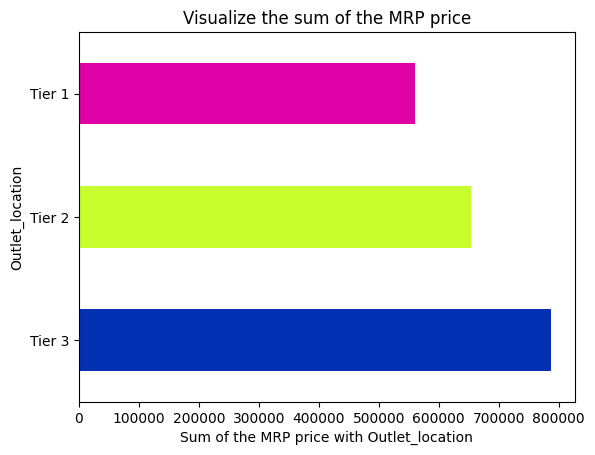

In [133]:
#Visualize the total amount of the each outletlocation with MRP Price visualize with barh charts
data.groupby('Outlet_Location_Type')['Item_MRP'].sum().sort_values(ascending=False)\
.plot(kind='barh',title="Visualize the sum of the MRP price",color=['#0431B4','#C8FE2E','#DF01A5'])
plt.xlabel("Sum of the MRP price with Outlet_location")
plt.ylabel("Outlet_location")
plt.show()


Observations:

1.In the First bar chats we groupby the items with item mrp price. In the bar char whe Sanck food have most profit and then next fruits and vegitable. And seafood have leaset sum of the mrp

2.Coming to the Second chart in the code we outlet values equal to the OUT049 value and loc the function and visualize with bar chats.

3.In the bar chats fruits and vegitable have most used item in OUT049 and snacks food. and least seafood.

4.The Thired chart we visualize the sum of the Mrp with outlet location. In the chart tire 3 get more amount compare to remaing.tire 1 is less amount compare to tire 2

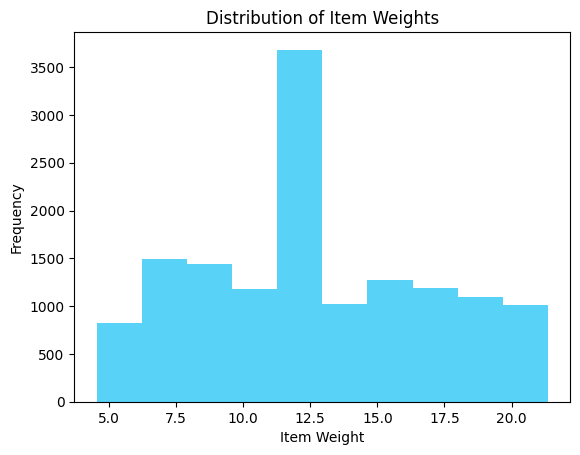

In [134]:
# Plot a histogram of item weights
plt.hist(data['Item_Weight'], bins=10,orientation='vertical',color='#58D3F7')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Item Weights')
plt.show()

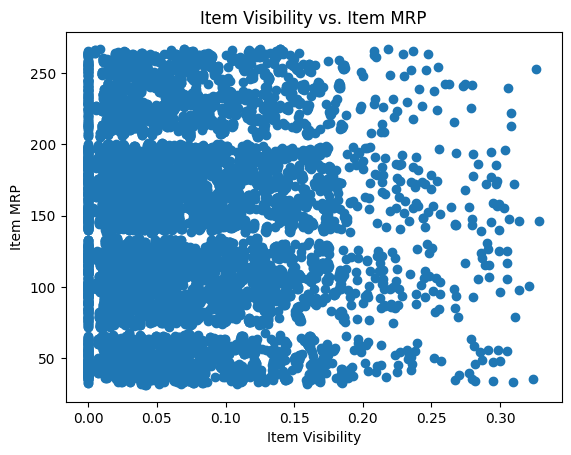

In [135]:
# Plot a scatter plot of item visibility vs. item MRP
plt.scatter(data['Item_Visibility'], data['Item_MRP'])
plt.xlabel('Item Visibility')
plt.ylabel('Item MRP')
plt.title('Item Visibility vs. Item MRP')
plt.show()

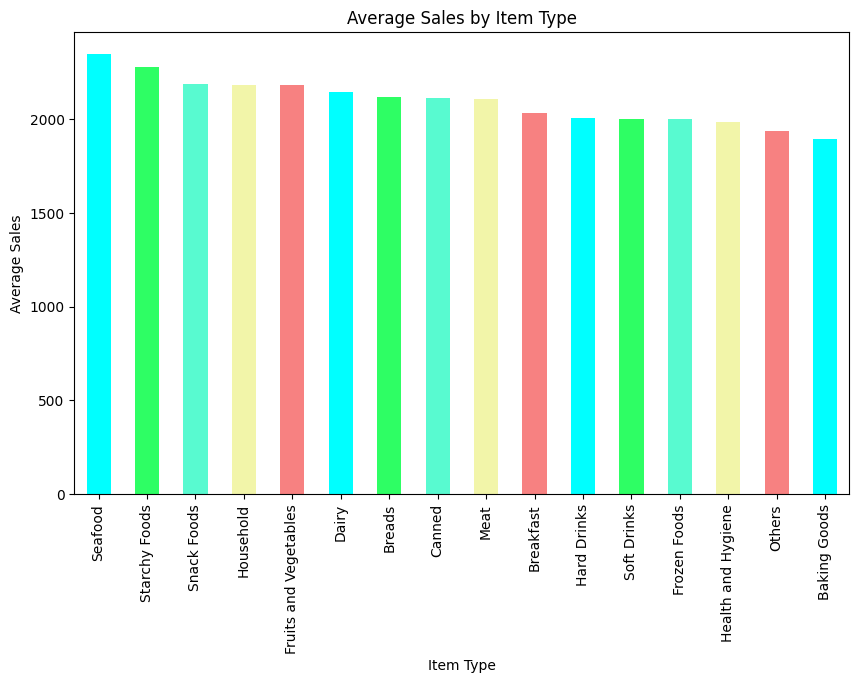

In [136]:
#Groupby the item type with outlet sales values with mean and visualize with bar chat
data.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)\
.plot(kind='bar',color=['#00FFFF','#2EFE64','#58FAD0','#F2F5A9','#F78181'],figsize=(10,6))
plt.xlabel('Item Type')
plt.ylabel('Average Sales')
plt.title('Average Sales by Item Type')
plt.show()

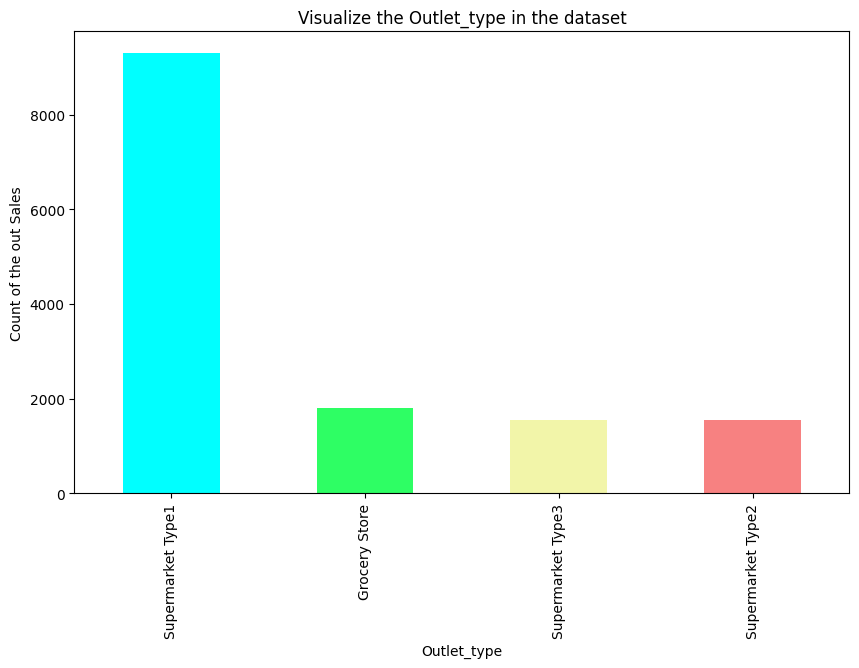

In [137]:
data['Outlet_Type'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',color=['#00FFFF','#2EFE64','#F2F5A9','#F78181'],figsize=(10,6))
plt.xlabel('Outlet_type')
plt.ylabel('Count of the out Sales')
plt.title('Visualize the Outlet_type in the dataset')
plt.show()


In [138]:
#The total sum of the item outlet sales
total_sum=data['Item_Outlet_Sales'].sum()
print(f'The Test_accuracy: {total_sum*0.01:.2f} Billons')

The Test_accuracy: 298189.33 Billons


In [139]:
current_year = 2023  # Assuming the current year is 2023
data['Years_Since_Established'] = current_year - data['Outlet_Establishment_Year']

 Machine Learning

1.First step we install all the required libraires

2.Then Convert the all categorical columns into numerical using LabelEncoder
Then divided into data indepent and dependent once we divide the normalize the data

3.Then we split the data into train and test data once we split it test size is 30 % and 70 % we take as train set.

4.We create a function for machine learning model buliding in the function we update all the values in the print it.

5.Then apply the Regression algorithms to the model such as LinearRegression,RandomForestRegressor,DecisionTreeRegressor etc.

Finally we do the Hyperparameter tuning with models.

In [ ]:
!pip install catboost
!pip install scikit-learn
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension


In [172]:
#import the all required libaries for machine Learning model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [143]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Years_Since_Established        int64
dtype: object

In [ ]:
#checking the categorical columns in the data types
categorical=[col for col in data.columns if data[col].dtype=='object']
categorical


In [151]:
#Convert the all the categorical columns into the numerical 
for col in data.select_dtypes(include='object').columns:
    labelencoder=LabelEncoder()
    labelencoder.fit(data[col].unique())
    data[col]=labelencoder.transform(data[col])
    print(f'{col}: {data[col].unique()}')

In [152]:
#divided the data into dependent and independent variable
X=data.drop('Item_Outlet_Sales',axis=1)
y=data['Item_Outlet_Sales']
#Normalize the data using the standardScaler and transorm the data into 0 to 1 range
scaler=StandardScaler()
X=scaler.fit_transform(X)
#Split the data into train and test data we takes 25 % for testing and 75 % for traing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [159]:
models=[]
models.append(('Linear Regression',LinearRegression()))
models.append(('Decision Tree',DecisionTreeRegressor()))
models.append(('Random Forest',RandomForestRegressor()))
models.append(('XGB',XGBRegressor()))

In [160]:
result=[]
model_names=[]
for name,model in models:
    cv_result=cross_val_score(model,X_train,y_train,cv=5,scoring='r2')
    result.append(cv_result)
    model_names.append(name)
    print(f"{name}: mean {cv_result.mean()} std {cv_result.std()}")

Linear Regression: mean 0.5815225400895062 std 0.0027332399835729194
Decision Tree: mean 0.34482620463412117 std 0.04611543038106682
Random Forest: mean 0.6590007343571473 std 0.012282040610498552
XGB: mean 0.6470196785758441 std 0.020842674482336145


In [161]:
def model_buliding(model,X_train,X_test,y_train,y_test):
    #fit the train data to the model
    model.fit(X_train,y_train)
    # predict the test data for the model
    y_pred=model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_sqr=r2_score(y_test, y_pred)
    N=len(y_test)
    k=4
    adj_r2score=(1-r2_sqr)*(N-1)/(N-k-1)

    print('MAE is {}'.format(mae))
    print('MSE is {}'.format(mse))
    print('R2 score is {}'.format(r2))
    print('RMSE score is {}'.format(rmse))
    print('Adjusted r2_Score {}'.format(adj_r2score))

In [162]:
# Apply the Linear Regression model 
linear=LinearRegression()
model_buliding(linear,X_train,X_test,y_train,y_test)

MAE is 725.5582743980078
MSE is 1040090.960404347
R2 score is 0.572823092006394
RMSE score is 1019.8484987508424
Adjusted r2_Score 0.42757829573896056


In [163]:
#Apply DecisionTreeRegressor model
tree=DecisionTreeRegressor()
model_buliding(tree,X_train,X_test,y_train,y_test)

MAE is 839.3504784450173
MSE is 1659756.595686485
R2 score is 0.31831953400334256
RMSE score is 1288.315410016695
Adjusted r2_Score 0.6823209926266754


In [164]:
#Apply the RandomForestRegressor model
random=RandomForestRegressor()
model_buliding(random,X_train,X_test,y_train,y_test)

MAE is 576.9580393984634
MSE is 843450.8334783824
R2 score is 0.6535853758888035
RMSE score is 918.3957934781619
Adjusted r2_Score 0.3467401252848974


In [165]:
#Apply the RandomForestRegressor model
xgb=XGBRegressor()
model_buliding(xgb,X_train,X_test,y_train,y_test)

MAE is 579.9828376120515
MSE is 853912.9300534921
R2 score is 0.6492884766403489
RMSE score is 924.0740933786057
Adjusted r2_Score 0.3510410620238368


In [ ]:
#Apply the RandomForestRegressor model

cat=CatBoostRegressor(learning_rate=0.01,iterations=5)
model_buliding(cat,X_train,X_test,y_train,y_test)

Conclusion:

From the Above model we get good score for catboostRegressor get good score
